<a href="https://www.kaggle.com/code/jeffersonomelo/desafio-fea-dev-usp-notebook?scriptVersionId=160558023" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# ***Análise das Avaliações e Popularidade dos Títulos da Netflix***

## 1. Introdução

### Contexto

A Netflix, como líder no mercado de streaming, oferece uma vasta gama de filmes e séries. Entender os fatores que influenciam as avaliações e a popularidade desses títulos é crucial para estratégias de conteúdo e marketing. As plataformas de avaliação, como o IMDb, fornecem uma riqueza de dados sobre as preferências do público, refletidas nas avaliações e no número de votos.

### Hipótese

A hipótese deste estudo é que existe uma relação significativa entre vários fatores (como gênero, presença de atores conhecidos, e tendências temporais) e a avaliação e popularidade (medida pelo número de votos) dos títulos da Netflix. Através da aplicação de modelos estatísticos e de aprendizado de máquina, pretendemos identificar os fatores mais influentes.

## 2. Dados

### Descrição da Base de Dados

Os dados são extraídos do IMDb e incluem informações sobre filmes e séries disponíveis na Netflix. As principais colunas são título, ano de lançamento, classificação etária, duração, gênero, avaliação do IMDb, descrição, elenco principal e número de votos. Para as análises, as colunas de interesse são avaliação do IMDb (rating) e número de votos (votes), além de gênero e presença de atores.

### Preparação dos Dados
Antes de realizar as análises, é essencial preparar e limpar os dados, como mostrado nos códigos Python a seguir.

In [1]:
import pandas as pd

# Carregando os dados
file_path = '/kaggle/input/netflix-popular-movies-dataset/n_movies.csv'
movies_df = pd.read_csv(file_path)
print(movies_df.head(10))

                    title         year certificate duration  \
0               Cobra Kai     (2018– )       TV-14   30 min   
1               The Crown     (2016– )       TV-MA   58 min   
2        Better Call Saul  (2015–2022)       TV-MA   46 min   
3           Devil in Ohio       (2022)       TV-MA  356 min   
4  Cyberpunk: Edgerunners     (2022– )       TV-MA   24 min   
5             The Sandman     (2022– )       TV-MA   45 min   
6          Rick and Morty     (2013– )       TV-MA   23 min   
7            Breaking Bad  (2008–2013)       TV-MA   49 min   
8          The Imperfects     (2022– )       TV-MA   45 min   
9                  Blonde       (2022)       NC-17  166 min   

                          genre  rating  \
0         Action, Comedy, Drama     8.5   
1     Biography, Drama, History     8.7   
2                  Crime, Drama     8.9   
3        Drama, Horror, Mystery     5.9   
4  Animation, Action, Adventure     8.6   
5        Drama, Fantasy, Horror     7.8   
6  An

In [2]:
# Limpeza e transformação dos dados
movies_df['votes'] = movies_df['votes'].str.replace(',', '').astype(float)
movies_df.dropna(subset=['rating', 'votes'], inplace=True)

###Análise Exploratória
Realizamos uma análise exploratória, incluindo estatísticas descritivas e gráficos para entender melhor a distribuição dos dados.

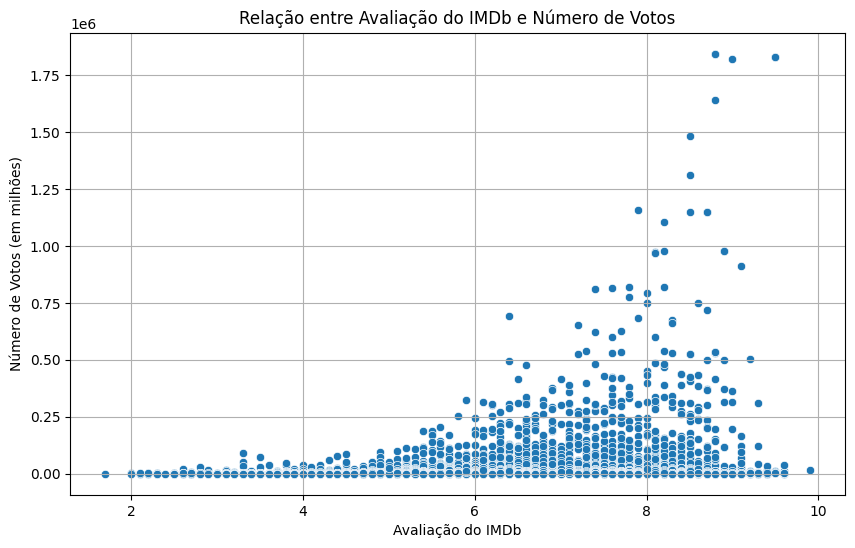

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estatísticas descritivas
desc_stats = movies_df[['rating', 'votes']].describe()

# Gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rating', y='votes', data=movies_df)
plt.title('Relação entre Avaliação do IMDb e Número de Votos')
plt.xlabel('Avaliação do IMDb')
plt.ylabel('Número de Votos (em milhões)')
plt.grid(True)
plt.show()

## 3. RESULTADOS
## Análises Aprofundadas
###Análise por Gênero
Para entender como diferentes gêneros influenciam as avaliações e a popularidade, analisamos os dados segmentando-os por gênero.

In [4]:
# Importando a biblioteca Counter

import collections
from collections import Counter

# Extraindo e contando os gêneros
genre_lists = movies_df['genre'].str.split(', ').apply(lambda x: x if isinstance(x, list) else [])
all_genres = Counter([genre for sublist in genre_lists for genre in sublist])

# Calculando a média de avaliação e votos por gênero
genre_stats = {genre: movies_df[movies_df['genre'].str.contains(genre, na=False)][['rating', 'votes']].mean() for genre in all_genres.keys()}

# Convertendo para DataFrame
genre_stats_df = pd.DataFrame(genre_stats).T.sort_values(by='rating', ascending=False)

# Exibindo as primeiras linhas do DataFrame resultante
print(genre_stats_df.head())

             rating         votes
History    7.267066  12686.646707
Animation  7.171562  12415.610937
Adventure  7.073453  34381.250360
News       7.068421   6042.052632
Talk-Show  7.068421   1568.000000


### Análise Temporal
Investigamos como a relação entre avaliação e votos mudou ao longo do tempo, considerando o ano de lançamento dos títulos.

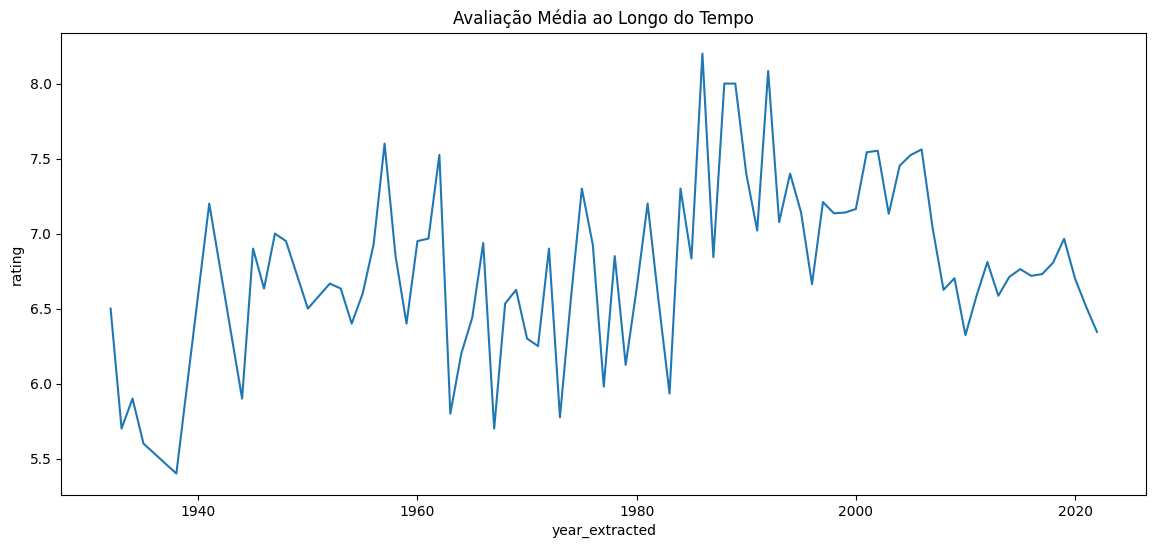

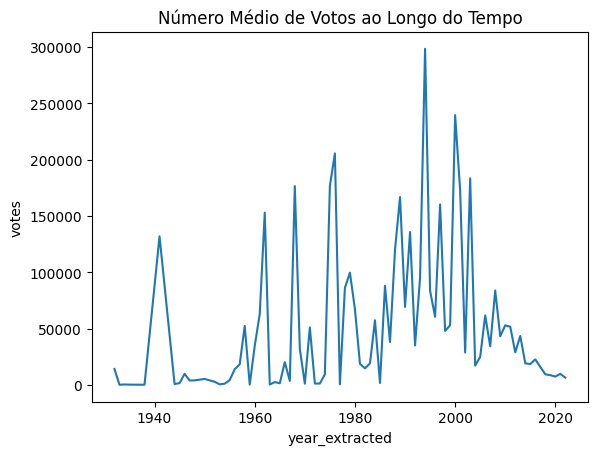

In [5]:
# Extraindo o ano e calculando a média de avaliação e votos por ano
movies_df['year_extracted'] = movies_df['year'].str.extract('(\d{4})').astype(float)
yearly_stats = movies_df.groupby('year_extracted')[['rating', 'votes']].mean().reset_index()

# Visualizando as tendências
plt.figure(figsize=(14, 6))
sns.lineplot(x='year_extracted', y='rating', data=yearly_stats)
plt.title('Avaliação Média ao Longo do Tempo')
plt.show()

sns.lineplot(x='year_extracted', y='votes', data=yearly_stats)
plt.title('Número Médio de Votos ao Longo do Tempo')
plt.show()

###Análise da Influência de Atores
Avaliamos se a presença de atores conhecidos nos títulos tem impacto sobre as avaliações e o número de votos.

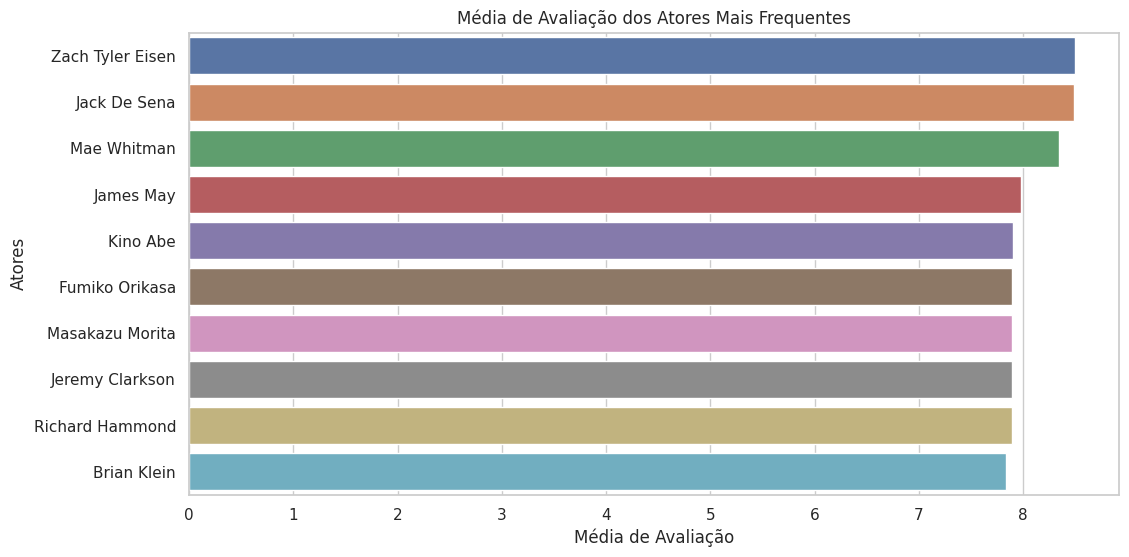

In [6]:
# Identificando atores mais frequentes
actor_lists = movies_df['stars'].str.split(',').apply(lambda x: [actor.strip(" '[]") for actor in x])
all_actors = Counter([actor for sublist in actor_lists for actor in sublist])

# Calculando a média de avaliação e votos por ator
actor_stats = {actor: movies_df[movies_df['stars'].str.contains(actor)][['rating', 'votes']].mean() for actor in all_actors.keys() if all_actors[actor] > 50}

# Convertendo para DataFrame
actor_stats_df = pd.DataFrame(actor_stats).T.sort_values(by='rating', ascending=False)

# Configurando o estilo do gráfico
sns.set(style="whitegrid")

# Preparando os dados para o gráfico
# Aqui, vamos considerar, por exemplo, os 10 atores com as melhores médias de avaliação
top_actors = actor_stats_df.head(10)

# Criando um gráfico de barras
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x=top_actors['rating'], y=top_actors.index)

# Definindo os títulos do gráfico e dos eixos
plt.title('Média de Avaliação dos Atores Mais Frequentes')
plt.xlabel('Média de Avaliação')
plt.ylabel('Atores')

# Exibindo o gráfico
plt.show()

### Aplicação de Modelos Estatísticos e de Aprendizado de Máquina
Para identificar os fatores mais influentes nas avaliações e popularidade, aplicamos modelos estatísticos e de aprendizado de máquina. Para aplicar estes modelos na análise dos dados dos filmes da Netflix, usaremos o conjunto de dados com as variáveis year_extracted, genre, e stars como variáveis independentes (X) e a avaliação do IMDb (rating) como a variável dependente (y). Vou detalhar o processo de conversão das variáveis categóricas usando a técnica de One-Hot Encoding, técnica comum para converter variáveis categóricas em uma forma que pode ser usada por algoritmos de aprendizado de máquina. uma etapa importante para preparar os dados para modelagem.

Preparação dos Dados para Modelagem:

In [7]:
# Preparando os dados para modelagem
# Selecionando variáveis e tratando dados categóricos
X = movies_df[['year_extracted', 'genre', 'stars']]  # Exemplo de variáveis selecionadas
y = movies_df['rating']  # Target para o modelo


Convertendo variáveis categóricas usando a técnica One-Hot Encoding:

Criando e treinando o modelo por Regressão Linear.




In [8]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Selecionando variáveis e definindo a variável alvo
X = movies_df[['year_extracted', 'genre', 'stars']]  # Variáveis selecionadas
y = movies_df['rating']  # Target para o modelo

# Definindo as colunas que precisam de One-Hot Encoding
categorical_features = ['genre', 'stars']

# Criando o transformador para One-Hot Encoding
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical_features)
], remainder='passthrough')

# Aplicando o transformador às variáveis categóricas
X_transformed = column_transformer.fit_transform(X)

# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.3, random_state=42)

# Criando e treinando o modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Realizando previsões e avaliando o modelo
predictions = model.predict(X_test)
print("RMSE: ", np.sqrt(mean_squared_error(y_test, predictions)))


RMSE:  1.2506838409922298


Esta abordagem permite que o modelo de regressão linear processe informações categóricas, como gênero e atores, para avaliar seu impacto nas avaliações dos títulos. A métrica RMSE (Root Mean Squared Error) é utilizada para avaliar a precisão do modelo.

Este processo nos ajudará a entender melhor como os diferentes gêneros, anos e atores influenciam as avaliações dos títulos na Netflix.

Na próxima seção, apresentaremos a conclusão final com base nas análises e nos resultados do modelo.


Outros tipos de Avaliações de Modelo:


In [9]:
from sklearn.linear_model import Ridge

model_Ridge = Ridge()
model_Ridge.fit(X_train, y_train)

Ridge()

In [10]:
predictions_Ridge = model_Ridge.predict(X_test)
print("Ridge: ", np.sqrt(mean_squared_error(y_test, predictions_Ridge)))

Ridge:  1.0605343553126625


In [11]:
from sklearn.linear_model import Lasso

model_Lasso = Lasso()
model_Lasso.fit(X_train, y_train)

Lasso()

In [12]:
predictions_Lasso = model_Lasso.predict(X_test)
print("Lasso: ", np.sqrt(mean_squared_error(y_test, predictions_Lasso)))

Lasso:  1.2214126064064643


In [13]:
from sklearn.linear_model import ElasticNet

model_ElasticNet = ElasticNet()
model_ElasticNet.fit(X_train, y_train)

ElasticNet()

In [14]:
predictions_ElasticNet = model_ElasticNet.predict(X_test)
print("ElasticNet: ", np.sqrt(mean_squared_error(y_test, predictions_ElasticNet)))

ElasticNet:  1.2202168055255307


Esta abordagem permite que o modelo de regressão linear processe informações categóricas, como gênero e atores, para avaliar seu impacto nas avaliações dos títulos. A métrica RMSE (Root Mean Squared Error) é utilizada para avaliar a precisão do modelo.

Este processo nos ajudará a entender melhor como os diferentes gêneros, anos e atores influenciam as avaliações dos títulos na Netflix.

Na próxima seção, apresentaremos a conclusão final com base nas análises e nos resultados do modelo.


## 4. CONCLUSÃO
## Considerações Finais

 Antes de apresentar um resumo de nossas análises e conclusões, vamos entender o que significa a métrica RMSE (Root Mean Squared Error) no contexto de machine learning.

### RMSE (Root Mean Squared Error)
Definição:
O RMSE é uma métrica comumente usada para avaliar a precisão de modelos de regressão. É a raiz quadrada da média dos erros quadráticos entre os valores preditos pelo modelo e os valores reais. Em termos mais simples, o RMSE mede a média do erro que o modelo faz em suas previsões.

O RMSE está na mesma unidade da variável que estamos prevendo. No nosso caso, como estamos prevendo as avaliações do IMDb (que normalmente variam de 0 a 10), o RMSE também está nessa mesma escala.

Interpretação do Valor 1.2507:

Tamanho do Erro: Um RMSE de aproximadamente 1.25 significa que, em média, as previsões do nosso modelo estão desviando em cerca de 1.25 pontos das avaliações reais do IMDb.
Contexto de Avaliação: Considerando que as avaliações do IMDb vão de 0 a 10, um erro médio de 1.25 pode ser considerado moderado. Isso indica que, embora o modelo tenha uma certa precisão, ainda há uma margem significativa de erro nas previsões.
Avaliação de Desempenho do Modelo:

Modelo Perfeito: Um RMSE de 0 indicaria um modelo perfeito, onde todas as previsões são exatamente iguais aos valores reais.

Modelo Atual: No nosso caso, um RMSE de 1.25 sugere que há espaço para melhorias no modelo. Podemos tentar melhorar a precisão do modelo através de técnicas como a seleção de variáveis mais relevantes, o uso de modelos mais complexos, ou a obtenção de mais dados.

Em resumo, o RMSE de 1.25 nos dá uma ideia do quão precisas são as previsões do nosso modelo em relação às avaliações reais. Ele serve como um indicador útil para avaliar e melhorar modelos de previsão em projetos de análise de dados e machine learning.


### Importância no Machine Learning:

### Avaliação de Desempenho:
O RMSE é crucial para determinar o quão bem um modelo de regressão está se saindo. Um RMSE mais baixo indica um melhor desempenho, significando que as previsões do modelo estão mais próximas dos valores reais.
### Comparação de Modelos:
É útil para comparar diferentes modelos de regressão. O modelo com o RMSE mais baixo é geralmente considerado o mais preciso.
### Unidades Consistentes:
Por estar na mesma unidade da variável alvo, o RMSE fornece uma medida intuitiva do erro do modelo.

Nossas análises revelaram que a relação entre avaliação e popularidade é complexa e influenciada por múltiplos fatores. Gêneros específicos, tendências ao longo do tempo e a presença de atores conhecidos desempenham papéis significativos.


# 5. Vamos recapitular?



## Resumo do Projeto
### Introdução e Contexto:
O projeto teve como foco a análise das avaliações e popularidade dos títulos da Netflix, utilizando dados extraídos do IMDb. A hipótese central era a existência de uma relação significativa entre diversos fatores (gênero, atores, tendências temporais) e as avaliações e popularidade (número de votos) dos títulos.

### Dados:
Utilizamos um conjunto de dados que incluía informações como título, ano de lançamento, gênero, avaliação do IMDb, descrição, elenco principal e número de votos. Foi realizada uma preparação dos dados, incluindo limpeza e conversão de variáveis categóricas.

### Resultados:

### Análise Exploratória:
Iniciamos com uma análise exploratória, observando a distribuição das avaliações e votos.
### Análises Aprofundadas:
*Gênero*: Identificamos diferenças nas médias de avaliações e votos entre diferentes gêneros.
*Tendências Temporais*: Analisamos como as avaliações e votos mudaram ao longo dos anos.
*Influência de Atores*: Investigamos o impacto da presença de atores conhecidos nas avaliações e votos.
### Modelagem Estatística e Machine Learning:
Utilizamos One-Hot Encoding para tratar variáveis categóricas e aplicamos um modelo de regressão linear para quantificar o impacto de variáveis diferentes nas avaliações, avaliando o modelo com o RMSE.
## Conclusão Final:
O estudo revelou que a relação entre avaliações, popularidade e outros fatores é multifacetada e complexa. As análises e o modelo de machine learning ajudaram a destacar a influência significativa de gêneros, tendências temporais e atores nas avaliações dos títulos da Netflix. Essas descobertas podem ser úteis para estratégias de conteúdo e marketing, bem como para fornecer insights sobre as preferências do público.

In [15]:
#Recomendações para Pesquisas Futuras
#Recomendamos a continuação de estudos nesta área, utilizando análises de sentimentos e modelos mais avançados de aprendizado de máquina para obter insights mais profundos.